<a href="https://colab.research.google.com/github/github123-alt/AnK_Internship/blob/main/Day_3_at_AnK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('/customers.csv')
display(df.head())
display(df.info())
df = df.dropna()

,CustomerID,Name,Gender,Age,Phone,Annual Income (k$),Spending Score (1-100),Country
0,1,John Doe,Male,19,555-1234,15,39,USA
1,2,Jane Smith,Female,21,555-5678,15,81,USA
2,3,Sam Lee,Male,20,555-8765,16,6,Canada
3,4,Alice Kim,Female,23,555-4321,16,77,Canada
4,5,Bob Brown,Male,31,555-2222,17,40,UK


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Name                    10 non-null     object
 2   Gender                  10 non-null     object
 3   Age                     10 non-null     int64 
 4   Phone                   10 non-null     object
 5   Annual Income (k$)      10 non-null     int64 
 6   Spending Score (1-100)  10 non-null     int64 
 7   Country                 10 non-null     object
dtypes: int64(4), object(4)
memory usage: 772.0+ bytes


None

In [6]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

In [7]:
x = df[['Income', 'SpendingScore']]

In [8]:
scaler = StandardScaler()         #Data Normalizing/Preprocessing
x_scaled = scaler.fit_transform(x)

In [9]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=55)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

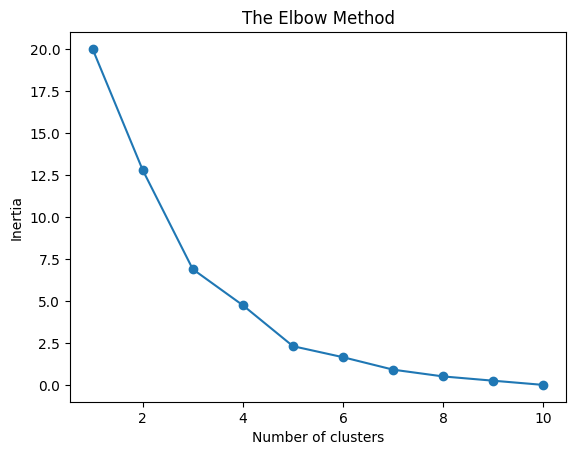

In [10]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=55)
df['Cluster']=kmeans.fit_predict(x_scaled)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=55)

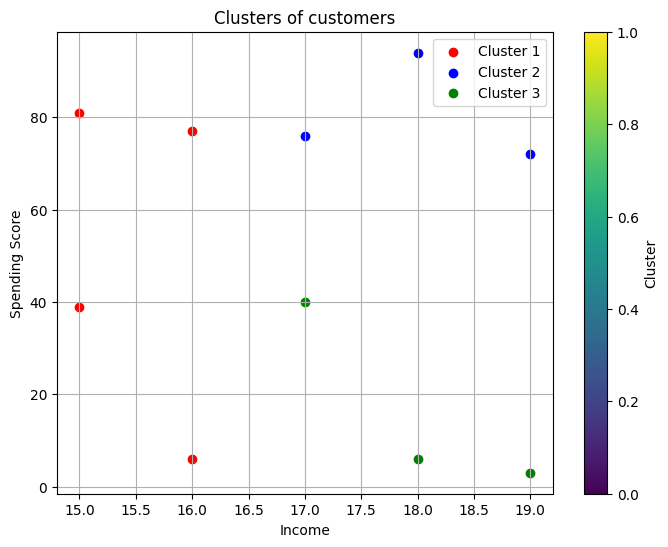

In [12]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green']

for i, color in enumerate(colors):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Income'], cluster_data['SpendingScore'],
                color=color, label=f'Cluster {i+1}')

plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [13]:
cluster_summary = df.groupby('Cluster')[['Income','SpendingScore']].mean()
display(cluster_summary)

,Income,SpendingScore
Cluster,,
0,15.5,50.750000
1,18.0,80.666667
2,18.0,16.333333


In [14]:
print(kmeans.inertia_)


6.888224291196035
